# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: 2

## Data Preparation - 15pts
This section describes the data preparation steps that were taken on the US Accidents dataset. As a refresher, the data dataset is a country wide dataset covering 49 states within the United States. The data has been collected from several data sources which broadcast traffic accident related information. The dataset spans the time period of Feburary 2016 through December 2019. The data was sourced from the Kaggle website (https://www.kaggle.com/sobhanmoosavi/us-accidents).

First we will setup the notebook by importing the required libraries.

In [68]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#ignore warnings
import warnings
warnings.simplefilter('ignore')

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

Now we'll load the pre-cleaned data files from previous work. We've saved this data into files in order to same memory usage. This data has already been split into training and test datasets using an 80/20 split of data. Since this data is temporal all data has been sorted by the 'Start_Date' field. This allows us to obtain approximately 50 months of training data and 7 months of test data. 

In [2]:
#Read in the train/test files that have been created from the prior projects. This is an 80/20 split
train_file = 'train.csv'
test_file = 'test.csv'
test_filepath_BC = '/home/jbcroom/'
train_filepath_BC = '/home/jbcroom/'
test_filepath_BC2 = 'C:/RAI/'
train_filepath_BC2 = 'C:/RAI/'

testfilepath_AR = ''
train_filepath_AR = ''

test_filepath_JB = ''
train_filepath_JB = ''

test_filepath_SO = ''
train_filepath_SO = ''

#read in the training and test data 
df_test = pd.read_csv(test_filepath_BC2 + test_file)
df_train = pd.read_csv(train_filepath_BC2 + train_file)

Verify that our data has loaded correctly for the test and traing dataframes.

In [3]:
df_test.head()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),State,Timezone,Start_Time,Weather_Condition,SM_Interim,Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado,TMC_200.0,TMC_201.0,TMC_202.0,TMC_203.0,TMC_206.0,TMC_222.0,TMC_229.0,TMC_236.0,TMC_239.0,TMC_241.0,TMC_244.0,TMC_245.0,TMC_246.0,TMC_247.0,TMC_248.0,TMC_336.0,TMC_339.0,TMC_341.0,TMC_343.0,TMC_351.0,TMC_406.0
0,0,0.0,39.762531,-84.259239,0.00,51.0,51.0,66.0,29.09,10.0,10.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,99.0,OH,US/Eastern,2019-05-08 07:38:53,Fair,May,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,41.100109,-73.953377,3.26,57.0,57.0,69.0,29.73,10.0,7.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,45.0,NY,US/Eastern,2019-05-08 07:38:55,Fair,May,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,39.190506,-74.820801,0.00,62.0,62.0,84.0,30.08,10.0,5.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,144.0,NJ,US/Eastern,2019-05-08 07:38:55,Cloudy,May,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0.0,41.215012,-96.023949,0.00,54.0,54.0,94.0,28.60,7.0,7.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,60.0,NE,US/Central,2019-05-08 07:38:59,Rain,May,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.0,39.708630,-104.810005,0.00,43.0,36.0,100.0,24.25,2.0,13.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,61.0,CO,US/Mountain,2019-05-08 07:39:00,Light Rain,May,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0

In [4]:
df_train.head()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),State,Timezone,Start_Time,Weather_Condition,SM_Interim,Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado,TMC_200.0,TMC_201.0,TMC_202.0,TMC_203.0,TMC_206.0,TMC_222.0,TMC_229.0,TMC_236.0,TMC_239.0,TMC_241.0,TMC_244.0,TMC_245.0,TMC_246.0,TMC_247.0,TMC_248.0,TMC_336.0,TMC_339.0,TMC_341.0,TMC_343.0,TMC_351.0,TMC_406.0
0,0,1.0,39.865147,-84.058723,0.01,36.9,22.6,91.0,29.68,10.0,9.2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,314.0,OH,US/Eastern,2016-02-08 05:46:00,Light Rain,Feb,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,39.928059,-82.831184,0.01,37.9,22.6,100.0,29.65,10.0,9.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,30.0,OH,US/Eastern,2016-02-08 06:07:59,Light Rain,Feb,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,39.063148,-84.032608,0.01,36.0,33.3,100.0,29.67,10.0,3.5,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,30.0,OH,US/Eastern,2016-02-08 06:49:27,Overcast,Feb,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1.0,39.747753,-84.205582,0.01,35.1,31.0,96.0,29.64,9.0,4.6,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,30.0,OH,US/Eastern,2016-02-08 07:23:34,Mostly Cloudy,Feb,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.0,39.627781,-84.188354,0.01,36.0,33.3,89.0,29.65,6.0,3.5,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,30.0,OH,US/Eastern,2016-02-08 07:39:07,Mostly Cloudy,Feb,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,

Over the course of the EDA the data has been reshaped some to allow for easier analysis. Those changes are:

- Creation of a new feature called Weather Condition Collapsed. Upon further review of the Weather Condition feature there were data inconsistences in the data that needed to be addressed. For example, a weather condition may be listed as 'Thunderstorm' or 'T-Storm'. These are in effect the same condition. To alleviate this inconsistency the data was re-mapped to ensure these were removed. 


- One-hot encoding of the features: State, Start_Month, Start_Day, Sunrise_Sunset, Side, Weather_Condition_Collapsed, TMC

These changes can be seen in the data listings above. 

Prepare the data frames with the training and test data to split into our independent and dependent variables. We'll also remove the original versions of the columns that were one-hot encoded as well as the dependent variable. The TMC variable, even though one hot encoded, will be removed as well. This variable provided data leakage in the model and should be removed to prevent further leakage.

In order to ensure we do not have poorly trained models we'll take a validation set of data using 20% of the training data. This will provide us a good way to test and manipulate models without impacting our test data set.  

We'll build our first data sets using severity as the dependent variable. 

In [5]:
# Get validation set off of last 20% of train data
df_train=df_train.sort_values("Start_Time")
train_size = int(len(df_train) * 0.8)

X_train, X_val = df_train[0:train_size], df_train[train_size:len(df_train)]

y = df_train['Severity']
y_train, y_val = y[0:train_size], y[train_size:len(y)]

#Build training/validation set for severity
df_X_train = X_train.copy()
df_X_test = X_val.copy()

df_Y_train = y_train.copy()
df_Y_test = y_val.copy()

#list columns to remove:
removeList = {'Severity', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0', 'TMC_200.0',
    'TMC_201.0','TMC_202.0','TMC_203.0',
    'TMC_206.0','TMC_222.0','TMC_229.0',
    'TMC_236.0','TMC_239.0','TMC_241.0',
    'TMC_244.0','TMC_245.0','TMC_246.0',
    'TMC_247.0','TMC_248.0','TMC_336.0',
    'TMC_339.0','TMC_341.0','TMC_343.0',
    'TMC_351.0','TMC_406.0'} 

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

Check our data frames to ensure that we had the appropriate data removed and also check the shape of the data frames is consistent

In [7]:
print("X-train: ",df_X_train.shape)
print("Y-train: ",df_Y_train.shape)
print("X-test: ",df_X_test.shape)
print("Y-test: ",df_Y_test.shape)

X-train:  (1408140, 122)
Y-train:  (1408140,)
X-test:  (352036, 122)
Y-test:  (352036,)


Check the data distribution to verify if we have a balanced or imbalanced model. In this case we look fairly balanced.

In [8]:
df_train['Severity'].value_counts(normalize=True) 

0.0    0.643821
1.0    0.356179
Name: Severity, dtype: float64

In [9]:
X_train['Severity'].value_counts(normalize=True )

0.0    0.634936
1.0    0.365064
Name: Severity, dtype: float64

In [10]:
X_val['Severity'].value_counts(normalize=True)

0.0    0.679362
1.0    0.320638
Name: Severity, dtype: float64

## Modeling and Evaluation - 70pts

In this section various models will be built out and evaluated. Models  evaluations will be performed on both Severity (a categorical variable) and Distance (a continuous variable). Each feature type will have at least three models run against it. 

For the categorical variables we will focus on model precision and recall for comparisons instead of looking at model accuracy. Looking at precision and recall will provide a better model comparison as we want to ensure we distinguish between accident severity levels. 

For the continous variables we will focus on R-squared values. This will provide us a good indicator of how well we are able to predict the distance as it relates to accident severity. 

### Categorical Variable Modeling

In [11]:
#Convert dataframes to numpy arrays

X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()

Y_train = df_Y_train.to_numpy()
Y_test = df_Y_test.to_numpy()

In [12]:
print("X-train: ",X_train.shape)
print("X-test: ",X_test.shape)
print("Y-train: ",Y_train.shape)
print("Y-test: ",Y_test.shape)

X-train:  (1408140, 122)
X-test:  (352036, 122)
Y-train:  (1408140,)
Y-test:  (352036,)


### Logistic Regression Model

Execute a Logistic Regression Model on the severity categorical variable. The initial cut will be on the full feature set. Sice we have removed the TMC variable we do expect changes in the accuracy, precision and recall measures. We'll work off normalized data to make it easier for interpretation of variables.

In [15]:
# we want to normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

In [16]:
# logistic regression
%time
logistic_regression= LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear')
logistic_regression.fit(X_train_scaled,Y_train)
Y_pred=logistic_regression.predict(X_test_scaled)
print(mt.classification_report(Y_test,Y_pred))

Wall time: 0 ns
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79    239160
         1.0       0.56      0.62      0.59    112876

    accuracy                           0.73    352036
   macro avg       0.69      0.70      0.69    352036
weighted avg       0.73      0.73      0.73    352036



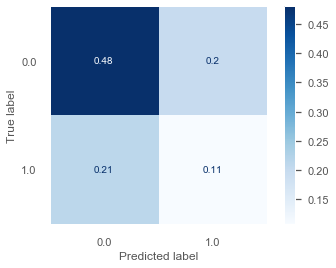

In [63]:
#Confusion Matrix
mt.plot_confusion_matrix(logistic_regression,X_test_scaled,Y_test,cmap=plt.cm.Blues,normalize='all')
plt.grid(False)

The table below lists the normalized coefficients for the model. 

In [36]:
# output the coefficients
weights = logistic_regression.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
zip_vars = zip(weights,variable_names)

for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

Start_Lat has weight of 0.02249674614899405
Start_Lng has weight of 1.5421068308627943
Distance(mi) has weight of 0.3433535825553595
Temperature(F) has weight of -0.007865406589999924
Wind_Chill(F) has weight of -0.022215502035668428
Humidity(%) has weight of -0.04546608135659245
Pressure(in) has weight of 0.026945131476478628
Visibility(mi) has weight of -0.004846401974481694
Wind_Speed(mph) has weight of 0.024077376509071508
Precipitation(in) has weight of 0.016598690932934687
PointOfInterest has weight of -0.17712128119945664
Bump has weight of -0.006674738257015669
Crossing has weight of -0.26813754216221547
Yield has weight of 0.025513652629127744
Junction has weight of 0.13123482196220718
No_Exit has weight of 0.0057360667479675045
Railway has weight of 0.04357104878144661
Roundabout has weight of -0.09619193260612967
Station has weight of -0.10693456760979386
Stop has weight of -0.2952955295966506
Traffic_Calming has weight of -0.02477777373424647
Traffic_Signal has weight of -0

Let's plot the coefficients of the variables to see which ones have the most pull and which ones we may be able to use to reduce the model. We'll take the absolute values of the coefficients and sort them to determine what a possible cutoff threshold should be for variables to keep and variables to remove. Given the current number of features the graph labels may be difficult to read, however since we're making a threshold cut this should have minimial impact at this point. 

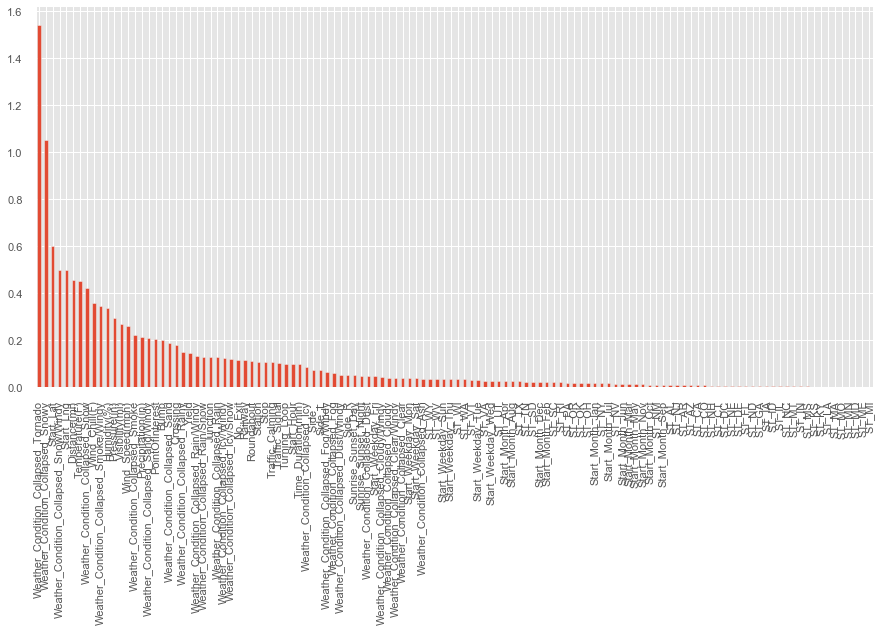

In [48]:
# now let's make a pandas Series with the names and values, and plot them
%matplotlib inline
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

variable_names = df_X_train.columns

weights = pd.Series(abs(logistic_regression.coef_[0]),index=variable_names).sort_values(ascending=False)             
weights.plot(kind='bar')
plt.show()

The initial cut of the data seems to indicate that any values below approximately 0.2 we can remove as they have little impact on the model. Let's get a closer look at which features remain.

In [50]:
# output the coefficients
coefToKeep = []
weights = logistic_regression.coef_.T # take transpose to make a column vector
variable_names = df_X_train.columns
for coef, name in zip(weights,variable_names):
    if abs(coef[0]) >= 0.2:
        print(name, 'has weight of', coef[0])
        coefToKeep.append(name)

Start_Lat has weight of -0.6003492107555453
Start_Lng has weight of -0.4983481989836349
Distance(mi) has weight of -0.4556819178527269
Temperature(F) has weight of -0.4496835829139853
Wind_Chill(F) has weight of -0.3579443563819664
Humidity(%) has weight of -0.3350078034807279
Pressure(in) has weight of -0.2952955295966506
Visibility(mi) has weight of -0.26813754216221547
Wind_Speed(mph) has weight of -0.26029254033418286
Precipitation(in) has weight of -0.2124204590996709
PointOfInterest has weight of -0.20243306688625198
Weather_Condition_Collapsed_Sand/Windy has weight of 0.20711686239761606
Weather_Condition_Collapsed_Smoke has weight of 0.21923272919043352
Weather_Condition_Collapsed_Smoke/Windy has weight of 0.3433535825553595
Weather_Condition_Collapsed_Snow has weight of 0.4199022232782047
Weather_Condition_Collapsed_Snow/Windy has weight of 0.49836471667686283
Weather_Condition_Collapsed_Snowy has weight of 1.0519595739502958
Weather_Condition_Collapsed_Tornado has weight of 1

As a quick sanity check of the remaining features let's see if they start to make sense. Latitude and Longitude both stay in the model. This would make sense as this indicates the point of the accident. The weather conditions and weather measurements logically make sense as we could expect weather conditions to have an impact on the severity of accidents. This starts to provide some confidence in the model changes. Let's do a check to see how these model features will impact our recall and precision. 

In [53]:
df_X_Train2 = pd.DataFrame(X_train_scaled,columns=df_X_train.columns)
df_X_Test2 = pd.DataFrame(X_test_scaled,columns=df_X_test.columns)

df_X_Train2 = df_X_Train2[coefToKeep]
df_X_Test2 = df_X_Test2[coefToKeep]

#convert our test/train dataframes to numpy arrays
X_train2 = df_X_Train2.to_numpy()
X_test2 = df_X_Test2.to_numpy()

In [56]:
#NOTE: Code below adapted from the course lectures
# we want to normalize the features based upon the mean and standard deviation of each column. 
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train2) # find scalings for each column that make this zero mean and unit std

X_train2_scaled = scl_obj.transform(X_train2) # apply to training
X_test2_scaled = scl_obj.transform(X_test2) # apply those means and std to the test set 

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') 
lr_clf.fit(X_train2_scaled,y_train)  # train object

Y_hat=lr_clf.predict(X_test2_scaled) # get test set predictions

print(mt.classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81    239160
         1.0       0.59      0.09      0.16    112876

    accuracy                           0.69    352036
   macro avg       0.64      0.53      0.48    352036
weighted avg       0.66      0.69      0.60    352036



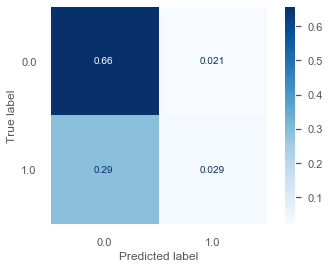

In [62]:
#Confusion Matrix
mt.plot_confusion_matrix(lr_clf,X_test2_scaled,Y_test,cmap=plt.cm.Blues,normalize='all')
plt.grid(False)

Comparing this new model to the original model we see that our recall for high severity incidents dropped drastically to 0.09 from 0.62. This would indicate we've gotten worse at predicting high severity accidents with this new model. Let's see if we can get better with a grid search.

In [66]:
#Grid Search

clf = LogisticRegression()

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')

grid_clf_acc.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [ ]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train_scaled, y_train)
search.best_params_

### Categorical Variable Modeling

In [20]:
#build two training/test sets for distance
#Build the Distance dataframes
df_X_train = df_train.copy()
df_X_test = df_test.copy()

df_Y_train = df_X_train['Distance(mi)'].copy()
df_Y_test = df_X_test['Distance(mi)'].copy()

#list columns to remove:
removeList = {'Distance(mi)', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0'} 

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

In [17]:
# Get validation set off of last 20% of train data
df_train=df_train.sort_values("Start_Time")
train_size = int(len(df_train) * 0.8)

X_train, X_val = df_train[0:train_size], df_train[train_size:len(df_train)]

y = df_train['Distance(mi)']
y_train, y_val = y[0:train_size], y[train_size:len(y)]

#Build training/validation set for severity
df_X_train = X_train.copy()
df_X_test = X_val.copy()

df_Y_train = y_train.copy()
df_Y_test = y_val.copy()

#list columns to remove:
removeList = {'Distance(mi)', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0', 'TMC_200.0',
    'TMC_201.0','TMC_202.0','TMC_203.0',
    'TMC_206.0','TMC_222.0','TMC_229.0',
    'TMC_236.0','TMC_239.0','TMC_241.0',
    'TMC_244.0','TMC_245.0','TMC_246.0',
    'TMC_247.0','TMC_248.0','TMC_336.0',
    'TMC_339.0','TMC_341.0','TMC_343.0',
    'TMC_351.0','TMC_406.0'} 

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

In [18]:
#Convert dataframes to numpy arrays
X_train = df_X_train.values
X_test = df_X_test.values

Y_train = df_Y_train.values
Y_test = df_Y_test.values

In [35]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 

### Linear Regression - Distance

In [36]:
#Linear regression - Distance
%%time
linear_regression= LinearRegression()
linear_regression.fit(X_train_scaled,Y_train)
Y_pred=linear_regression.predict(X_test_scaled)

# EV - higher = better performing | Higher = worse
predict_ev = mt.explained_variance_score(Y_test, Y_pred) 

# MAE - higher = worse performing | lower = better
predict_mae = mt.mean_absolute_error(Y_test, Y_pred)

# MSE - higher = worse performing | lower = better
predict_mse = mt.mean_squared_error(Y_test, Y_pred)  

# r2 score
predict_score2 = mt.r2_score(Y_test, Y_pred)

# Accuracy | Accuracy = (TP+TN)/Total
print("EV: ",predict_ev)
print("MAE: ",predict_mae)
print("MSE: ",predict_mse)
print("R2: ",predict_score2)

Wall time: 0 ns
EV:  -1.9819797725628813e+17
MAE:  5921073.106384683
MSE:  5.61003006634399e+17
R2:  -1.9821036413693834e+17


## Model Deployment - 5pts

## Exceptional Work - 10pts